In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('../_dataset/data.csv')
data.columns=['x','y']

data

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


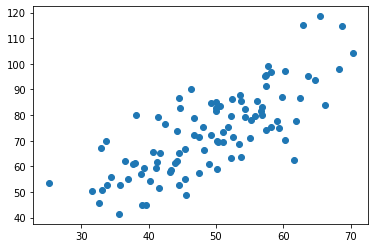

In [30]:
plt.scatter(data['x'], data['y'])
plt.show()

In [31]:
meanx, meany = data['x'].mean(), data['y'].mean()
meanx, meany

(49.12456364531804, 73.14947524769774)

In [32]:
sumnum, sumden = 0, 0
for i in range(len(data['x'])):
    num = data['y'].iloc[i] - meany
    den = data['x'].iloc[i] - meanx
    sumnum = sumnum + (den * num)
    sumden = sumden + (den**2)
b1 = sumnum / sumden
b1

1.2873573700109313

In [33]:
b0 = meany - (b1*meanx)
print(b0)

9.908606190326495


In [34]:
print(f'yi = {b0} + {b1} xi')

yi = 9.908606190326495 + 1.2873573700109313 xi


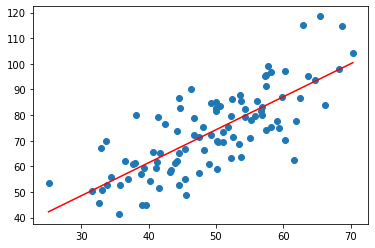

In [35]:
plt.scatter(data['x'], data['y']) 
plt.plot([min(data['x']), max(data['x'])], [min(b0 + (b1 * data['x'])), max(b0 + (b1 * data['x']))], color='red')  # regression line
plt.show()

In [36]:
def regressionFn(x):
    yi = b0 + b1 * x
    return yi

print(regressionFn(data['x'].iloc[2]))

71.02672077015146


In [37]:
sum = 0
for i in range(len(data['x'])):
    num = data['y'].iloc[i] - regressionFn(data['x'].iloc[i])
    sum += (num**2)

print(sum/len(data['x']))

107.4704370095091


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=data['y'],y_pred=regressionFn(data['x']))
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=data['y'],y_pred=regressionFn(data['x'])) #default=True
rmse = mean_squared_error(y_true=data['y'],y_pred=regressionFn(data['x']),squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 8.219591371333891
MSE: 107.47043700950906
RMSE: 10.366794924638427


In [39]:
corr = data.corr()

<AxesSubplot:>

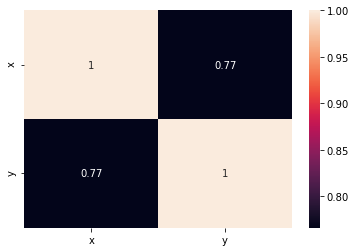

In [40]:
sns.heatmap(corr,annot=True)